# Numpy for Finance

<img width="320" src="http://i.imgur.com/1Z9bz5V.jpg">


#### 2017 FinanceData http://fb.com/financedata

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (14,4)
plt.rcParams["axes.grid"] = True

# NumPy
* **Num**erical **Py**thon, "넘피"라고 읽는다.
* https://numpy.org (홈페이지)
* https://docs.scipy.org/doc/numpy (공식 레퍼런스)
* 많은 scientific library 들이 NumPy 기반
 * Pandas, Scipy, matplotlib, scikit-learn, statsmodels
 * TensorFlow: NumPy ndarray 확장 + 자동미분 + GPU 지원

# NumPy 특징
수치 데이터를 다루는데 효율적이고 높은 성능을 제공 한다.
* 대규모 데이터를 빠르게
* 스칼라 연산과 비슷하게 연산을 수행
* Linear algebra, Fourier transform, Random 기능들
* 배열을 요소별로 조작하지 않고도 원소별 연산이 가능 - 브로드캐스팅(broadcasting)

* 향후 금융 데이터를 다룰 때, NumPy보다 pandas를 훨씬 더 많이 사용하게 된다.  
* NumPy에 대한 이해가 있으면 pandas를 이해하는데 더 도움이 많이 된다 (pandas가 NumPy기반으로 되어 있기 때문)
* 파이썬으로 머신러닝을 하게 된다면 NumPy에 대한 매우 중요한 역할을 한다. 

# ndarray
* ndarray (n-dimensional array object, 다차원 배열 객체)
* NumPy의 핵심
* 모든 요소가 동일한 datatype (기본은 float64)
* 다차원 데이터도 연속 할당: 높은 성능의 비밀 (파이썬 리스트는 비연속)

# 설치

#### 설치
```bash
$ sudo pip install numpy 
```

#### 설치 확인
```python
import numpy as np
np.__version__
```

# NumPy 성능
* NumPy와 Pandas를 사용하면, 반복문을 거의 사용하지 않고도 데이터 처리
* 코드가 줄어들 뿐만 아니라, 성능도 최대 수 백배까지 빠르다

In [2]:
import numpy as np

ls = range(1000)
%timeit [i**2 for i in ls]

a = np.arange(1000)
%timeit a**2

# 200배

1000 loops, best of 3: 366 µs per loop
The slowest run took 10.00 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 2.35 µs per loop


# 임포트

In [3]:
import numpy as np

# ndarray 생성
* np.array()  # 리스트, 튜플, 배열로 부터 ndarray를 생성
* 항상 0부터 시작한다는 점을 기억 
* 행,열: n-th row, n-th column

In [4]:
# 튜플로 부터 1차원 배열 생성
ar = np.array((10, 20, 30)) 

print (ar[0], ar[2])
print (ar.ndim)
print (ar.shape)

10 30
1
(3,)


In [5]:
#  배열로 부터 2차원 배열 생성
ar = np.array([[10, 20, 30], [ 60, 70, 80]]) 

print (ar.ndim)
print (ar.shape)

2
(2, 3)


# 생성과 초기화
* np.zeros() # ndarray를 생성하고 0으로 초기화
* np.empty() # ndarray을 생성하지만 초기화 하지 않는다.

In [6]:
ar = np.zeros((2,3))
print(ar)
print ('~' * 40)

ar = np.ones((2,3))
print(ar)
print ('~' * 40)

ar = np.full((2,3), 5)
print(ar)
print ('~' * 40)

ar = np.eye(2)
print(ar)
print ('~' * 40)

ar = np.random.random((2,3))
print(ar)

[[ 0.  0.  0.]
 [ 0.  0.  0.]]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
[[ 1.  1.  1.]
 [ 1.  1.  1.]]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
[[5 5 5]
 [5 5 5]]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
[[ 1.  0.]
 [ 0.  1.]]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
[[ 0.75151392  0.17702488  0.35903226]
 [ 0.21142192  0.19742751  0.91522107]]


# 다양한 생성 방법
* np.arange() # range와 비슷
* np.asarray() # 기존의 array로 부터 ndarray를 생성

(객체를 따로 생성하지 않는다. 즉, 요소들을 복사하지 않는다) <br> 
다차원 배열 생성이 가능하지만, 주로 2차원 배열을 사용

# np.arange()
* ar = np.arange(10) # 0 .. n-1
* ar = np.arange(1, 9, 2) # [start], (end), step
* ar = np.linspace(0, 10, 15) # 균일한 간격으로 생성 start, end, num

In [7]:
ar = np.arange(10) # 0 .. n-1
print (ar)
print ('~' * 40)

ar = np.arange(1, 9, 2) # [start], (end), step
print (ar)
print ('~' * 40)

ar = np.linspace(0, 10, 20)   # [start], [end], num
print (ar)
print ('~' * 40)

ar = np.linspace(0, 10, 20, endpoint=False)   # [start], (end), num
print (ar)

[0 1 2 3 4 5 6 7 8 9]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
[1 3 5 7]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
[  0.           0.52631579   1.05263158   1.57894737   2.10526316
   2.63157895   3.15789474   3.68421053   4.21052632   4.73684211
   5.26315789   5.78947368   6.31578947   6.84210526   7.36842105
   7.89473684   8.42105263   8.94736842   9.47368421  10.        ]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
[ 0.   0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5  7.
  7.5  8.   8.5  9.   9.5]


# 간단한 차트 (linspace)

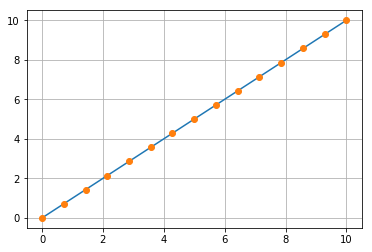

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

ar = np.linspace(0, 10, 15)   # start, end, num

plt.plot(ar, ar, '-')
plt.plot(ar, ar, 'o')

# ar.reshape()
* ar = np.arange(1, 10).reshape((3,3))

In [9]:
np.arange(1, 10)

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [10]:
ar = np.arange(1, 10).reshape((3,3))
ar

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

# 요소 지정 (행,열)

In [11]:
ar = np.array( [[10, 20, 30], [60, 70, 80], [90, 91, 92]] )

print (ar[1][2]) # 80
print (ar[1,2]) # 80 동일
print (ar[1,1]) # ar[1][1] 동일

80
80
70


# 데이터 타입
* ndarray을 생성하면서 데이터 타입을 지정할 수 있다.
* 주로 np.int (np.int64), np.float (np.float64) 사용

In [12]:
ar = np.array([10, 20, 30, 40])
ar.dtype #dtype('int64')

dtype('int64')

In [13]:
ar = np.array([10, 20, 30., 40.]) #30., 40. float
ar.dtype #dtype('float64')

dtype('float64')

In [14]:
ar = np.array([10, 20, 30., 40.], dtype='int')
ar.dtype #dtype('float64')

dtype('int64')

# 데이터 타입 바꾸기
ndarray.astype()로 타입을 변경할 수 있다
* 데이터가 새로 복사 된다.
* str 과 float, int 사이에 변환도 가능

In [15]:
ar = np.array([10, 20, 30, 40])
print(ar.dtype, ar)

af = np.ndarray.astype(ar, np.float)
print(af.dtype, af)

astr = np.ndarray.astype(af, np.str)
print(astr.dtype, astr)

int64 [10 20 30 40]
float64 [ 10.  20.  30.  40.]
<U32 ['10.0' '20.0' '30.0' '40.0']


# 슬라이싱
* 특정 영역을 지정하거나 잘라낸다


In [16]:
ar = np.arange(0,16).reshape((4,4))

print (ar)
print ('~' * 40)
print (ar[0])
print ('~' * 40)
print (ar[1,1])

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
[0 1 2 3]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
5


In [17]:
print (ar)
print ('~' * 40)

ar[2, :2] = 99 # 값 바꾸기
print (ar)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
[[ 0  1  2  3]
 [ 4  5  6  7]
 [99 99 10 11]
 [12 13 14 15]]


# 슬라이싱 slicing

<img width="80%" src="http://i.imgur.com/AAYMAEO.png" >

# 다양한 슬라이싱

```python
ar = np.arange(0,16).reshape((4,4))

ar[:]         # ar의 모든  row (= ar)
ar[0]        # row 0
ar[1]        # row 1
ar[:,1]      # col 1
ar[1:]       # row 1 이후, ar[1:,] 혹은 ar[1:,:] 와 동일한 표현
ar[:2]       # row 0~1
ar[:2,1:]   # row 0~1, col 1 이후 
ar[:2,:2]   # row 0~1, col 0~1
ar[2,:2]    # row 2, col 0~1
ar[:,2]      # col 2
ar[:,1:3]   # col 1~2
```

# 마이너스 인덱스

```python
ar[-2] # 끝에서 2번째 행
ar[-2:] # 마지막 2개 행
ar[:-2] # 마지막 2개 행을 제외한 모든 행
```

In [18]:
ar = np.arange(0,16).reshape((4,4))

print (ar)
print ('~' * 40)
print (ar[-2])
print ('~' * 40)
print (ar[-2:] )
print ('~' * 40)
print (ar[:-2])

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
[ 8  9 10 11]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
[[ 8  9 10 11]
 [12 13 14 15]]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
[[0 1 2 3]
 [4 5 6 7]]


# ndarry 연산
ndarray 간에 혹은 ndarray와 단일값 사이에 사칙연산(+, -, , /, * ) 이 가능
* ndarray op ndarray
* value op ndarray



# 연산 (브로드캐스팅)
크기가 다른 ndarray 간의 연산을 브로드캐스팅 이라고 한다


<img width="80%" src="http://i.imgur.com/ShEEg90.png" >

In [19]:
ar = np.array([[0, 1, 2], [10, 11, 12], [20, 21, 22], [30, 31, 32]])
print (ar)
print ('~' * 40)

p = ar * 10
print (p)

[[ 0  1  2]
 [10 11 12]
 [20 21 22]
 [30 31 32]]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
[[  0  10  20]
 [100 110 120]
 [200 210 220]
 [300 310 320]]


# 연산 (브로드캐스팅)

<img width="80%" src="http://i.imgur.com/j68keKC.png" >


In [20]:
ar = np.array([[0, 1, 2], [10, 11, 12], [20, 21, 22], [30, 31, 32]])
print (ar)

print ('~' * 40)
p = ar + np.array([[0, 1, 2]])
print (p)

print ('~' * 40)
p = ar + np.array([[0], [1], [2], [3]])
print (p)

print ('~' * 40)
p = np.array([[0], [10], [20], [30]]) + np.array([[0, 1, 2]])
print (p)

[[ 0  1  2]
 [10 11 12]
 [20 21 22]
 [30 31 32]]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
[[ 0  2  4]
 [10 12 14]
 [20 22 24]
 [30 32 34]]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
[[ 0  1  2]
 [11 12 13]
 [22 23 24]
 [33 34 35]]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
[[ 0  1  2]
 [10 11 12]
 [20 21 22]
 [30 31 32]]


# 슬라이싱과 연산
* ar[n:m] = 20 선택 영역에 브로드캐스팅
* 리스트의 슬라이싱과 차이점은 원본 ndarray에 대한 뷰라는 점
* 뷰에 대한 조작은 그대로 원본에 반영 (별도의 ndarray가 생성되지 않는다)

# 슬라이싱과 뷰

In [21]:
ar = np.array([[10, 20, 30], [60, 70, 80], [90, 91, 92]])
v = ar[1]
v[:] = 50 # v 배열 전체 요소에 20을 할당

#  v는 ar의 뷰, v의 값을 변경하는 것은 ar의 값을 변경
print(ar)

[[10 20 30]
 [50 50 50]
 [90 91 92]]


# 슬라이싱 예제

In [22]:
ar = np.zeros((5,5))
v = ar[1:-1,1:-1]
v[:] = 1
print(ar)

[[ 0.  0.  0.  0.  0.]
 [ 0.  1.  1.  1.  0.]
 [ 0.  1.  1.  1.  0.]
 [ 0.  1.  1.  1.  0.]
 [ 0.  0.  0.  0.  0.]]


# 다양한 슬라이싱

<img width="80%" src="http://i.imgur.com/KCnnlMh.png">

In [23]:
ar = np.array([[0], [10], [20], [30], [40], [50]]) + np.array([[0, 1, 2, 3, 4, 5]])
print(ar)

print ('~' * 40)
p = ar[0, 1:3]
print(p)

print ('~' * 40)
p = ar[:, 3]
print(p)


print ('~' * 40)
p = ar[4:, 4:]
print(p)

print ('~' * 40)
p = ar[2::2, ::2]
print(p)

[[ 0  1  2  3  4  5]
 [10 11 12 13 14 15]
 [20 21 22 23 24 25]
 [30 31 32 33 34 35]
 [40 41 42 43 44 45]
 [50 51 52 53 54 55]]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
[1 2]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
[ 3 13 23 33 43 53]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
[[44 45]
 [54 55]]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
[[20 22 24]
 [40 42 44]]


# 랜덤 배열 생성

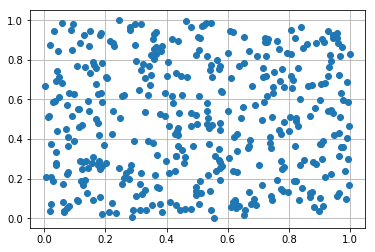

In [24]:
import matplotlib.pyplot as plt

# 랜덤 숫자로 채워진 ndarray를 생성
ar_x = np.random.rand(400)
ar_y = np.random.rand(400)
plt.plot(ar_x, ar_y, 'o')
plt.show()

# 랜덤 배열 생성 (정규분포)

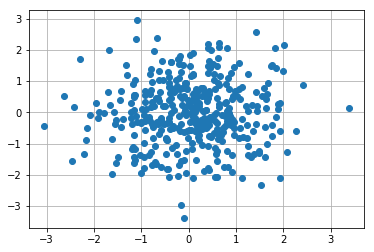

In [25]:
ar_x = np.random.randn(400)
ar_y = np.random.randn(400)
plt.plot(ar_x, ar_y, 'o')
plt.show()

# 랜덤 배열 생성 (정규분포)

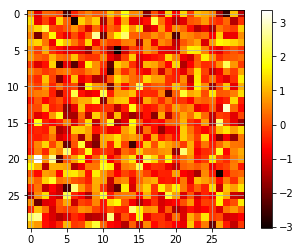

In [26]:
mat = np.random.randn(30, 30)
plt.imshow(mat, cmap=plt.cm.hot)
plt.colorbar()
plt.show()

# 불리언 인덱싱 (Boolean indexing)

In [27]:
city = np.array(['newyork', 'seoul', 'shanghai', 'tokyo', 'london'])
val = np.array([10, 20, 30, 40, 50])

city == 'seoul'         # array([False, True, False, False, False], dtype=bool)
val[city == 'seoul']   # array([20])
city[val >= 30]         # array(['shanghai', 'tokyo', 'london'], dtype='<U8')
city[city != 'tokyo']    # array(['newyork', 'seoul', 'shanghai', 'london']

mask = (city == 'shanghai') | (city == 'london')
val[mask]                # array([30, 50])

array([30, 50])

# 불리언 인덱싱 (필터링)

In [28]:
# 0 이하를 모두 0으로 만들기
x = np.array([-2, 0, 4, 6, -8, 5, 9, 2])
x[x < 0] = 0 

x

array([0, 0, 4, 6, 0, 5, 9, 2])

# 팬시 인덱싱 (fancy indexing)
* 정수 리스트(혹은 배열)를 이용하여 여러 개를 동시에 선택
* 팬시 인덱싱은 복사가 일어난다.
* ar[[3,4,5,2,0]] # 지정된 행을 순서대로 추출

In [29]:
ar = np.array([[0], [10], [20], [30], [40], [50]]) + np.array([[0, 1, 2, 3, 4, 5]])
ar

array([[ 0,  1,  2,  3,  4,  5],
       [10, 11, 12, 13, 14, 15],
       [20, 21, 22, 23, 24, 25],
       [30, 31, 32, 33, 34, 35],
       [40, 41, 42, 43, 44, 45],
       [50, 51, 52, 53, 54, 55]])

In [30]:
ar[[0, 2, -1]]   # 지정한 row 얻기

array([[ 0,  1,  2,  3,  4,  5],
       [20, 21, 22, 23, 24, 25],
       [50, 51, 52, 53, 54, 55]])

In [31]:
ar[:, [0, 2, -1]]  # 지정한 column 얻기

array([[ 0,  2,  5],
       [10, 12, 15],
       [20, 22, 25],
       [30, 32, 35],
       [40, 42, 45],
       [50, 52, 55]])

# 소트

In [32]:
ar = np.random.randint(0,10,5)
ar

array([0, 5, 1, 0, 1])

In [33]:
ar.sort()
ar

array([0, 0, 1, 1, 5])

# 소트 - 분위수 구하기
* 상위 25%가 되려면 몇 점 이상이어야 할까?

In [34]:
a = np.random.randn(100) * 100 #임의로 100개의 점수
a.sort()
a[int(0.75 * len(a))]

67.418416052142192

# 통계량
* np.mean(ar), ar.mean(): 산술평균
* ar.mean(axis=1): 한단계 낮은 차원의 배열 반환
* arr.sum(0): 0은 축

# 2D 배열
* ar.cumsum(0)
* ar.cumprod(1)

In [35]:
ar = np.arange(1,10).reshape(3,3)
ar

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [36]:
ar.cumsum()

array([ 1,  3,  6, 10, 15, 21, 28, 36, 45])

In [37]:
ar.cumsum(0)

array([[ 1,  2,  3],
       [ 5,  7,  9],
       [12, 15, 18]])

In [38]:
ar.cumsum(1)

array([[ 1,  3,  6],
       [ 4,  9, 15],
       [ 7, 15, 24]])

# 기본통계
* sum, mean, std, var, min, max, argmin argmax, cumsum, cumprod

In [39]:
ar = np.arange(1,21).reshape(4,5)
print(ar)

p = ar.mean()
print("ar.mean() ", p)

p = ar.mean(axis=0)
print("ar.mean(axis=0) ", p)

p = ar.mean(axis=1)
print("ar.mean(axis=1) ", p)

[[ 1  2  3  4  5]
 [ 6  7  8  9 10]
 [11 12 13 14 15]
 [16 17 18 19 20]]
ar.mean()  10.5
ar.mean(axis=0)  [  8.5   9.5  10.5  11.5  12.5]
ar.mean(axis=1)  [  3.   8.  13.  18.]


# 정규화 (normalize)
* 시작 행을 0으로 만들기 (초기값 대비 등락 관찰)

In [40]:
a = np.array( [[10,  20, 30], [15, 48, 30], [5, 4, 60]] )
a

array([[10, 20, 30],
       [15, 48, 30],
       [ 5,  4, 60]])

In [41]:
n = a/a[0, :] - 1
n

array([[ 0. ,  0. ,  0. ],
       [ 0.5,  1.4,  0. ],
       [-0.5, -0.8,  1. ]])

# 시뮬레이션 – 베르누이 실행

In [42]:
import numpy as np
from numpy.random import randint

steps = 100
movements = randint(0, 2, size=steps)
print (movements)

[1 0 1 1 1 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 0 1 1 0 0 1 1 1 0 0 1
 1 1 0 0 1 1 1 1 1 1 1 0 0 0 0 1 1 0 1 0 0 0 1 0 0 1 0 1 1 0 0 1 1 0 0 0 1
 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0 1 1 1 1 0]


# 랜덤워크 (Random walk)
* 이전 가격대비 -1, 0, 1 사이에서 움직인다고 하자.
* 각각을 가격 (상승, 동일, 하락)으로 생각할 수 있다.

In [43]:
plt.rcParams["figure.figsize"] = (14,4)

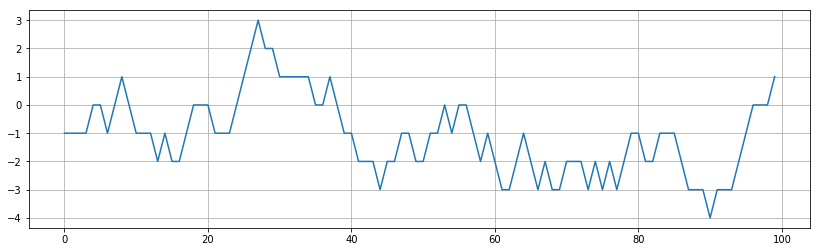

In [44]:
steps = np.random.randint(-1, 2, size=100)
walks = steps.cumsum()
plt.plot(walks)
plt.show()

# 랜덤워크 (다수 종목)
100 walk를 10개 종목에 대해 실행


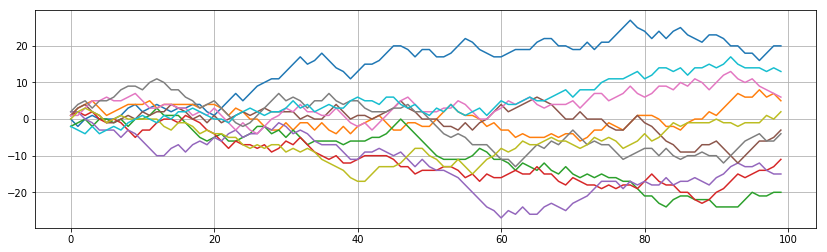

In [45]:
t = np.random.randint(-2, 3, size=(100,10))
walks = t.cumsum(0)
plt.plot(walks)
plt.show()

# 표준 정규분포 랜덤워크

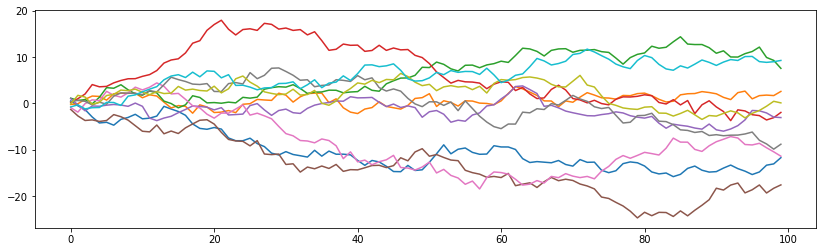

In [46]:
data = np.random.standard_normal((100, 10))

plt.plot(data.cumsum(axis=0))
plt.grid()
plt.show()

# 간단한 가격 생성 시뮬레이션
* 120 일간
* 하루에 +30%, -30% 무작위 등락

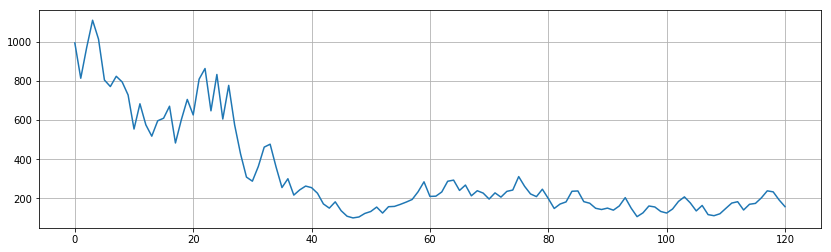

In [47]:
import random
import numpy as np
 
days = 120

def gen_prices():
    prices = [np.random.randint(5, 1000)]
    for i in range(days):
        change = np.random.uniform(-0.3, 0.3)
        prices.append(prices[-1]  + prices[-1] * change)
    return prices

plt.plot(gen_prices())
plt.show()

# 랜덤워크 가격 생성
* 초기가격(ini_price) = 100
* n 종목, 투자일수(tries) = 100
* 변동성(volatility) = 0.005 (0.5%)

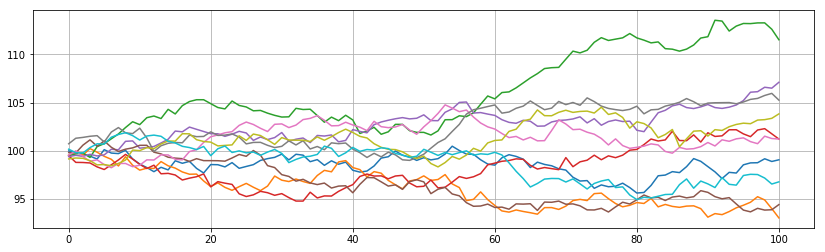

In [48]:
def random_walk(ini_price = 100, n = 10, tries = 100, volatility = 0.005):
    r = np.random.normal(size=(tries+1, n)) * volatility
    return ini_price * np.exp(np.cumsum(r, axis=0))

plt.plot(random_walk(n=10))
plt.show() 

# 정규분포 
random.normal()

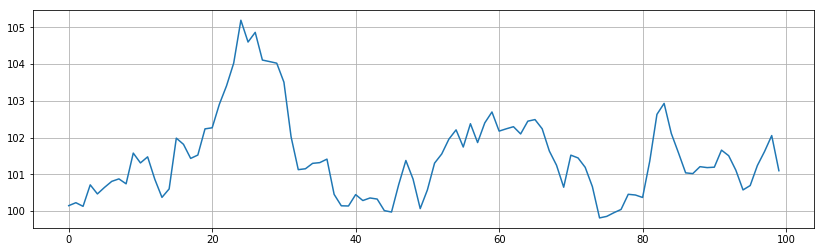

In [49]:
ini_price = 100.0
days = 100
random_numbers = np.random.normal(size=days) * 0.005
multipliers = 1 + random_numbers

prices = ini_price * np.cumprod(multipliers)
plt.plot(prices)
plt.show()

# 수익률

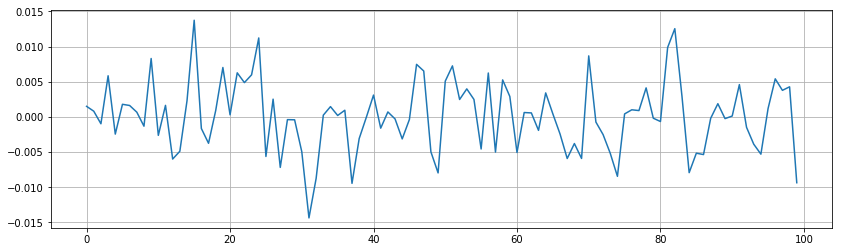

In [50]:
plt.plot(multipliers - 1)
plt.show()

# 파일 저장, 읽기 - savetxt, loadtxt 

numpy.savetxt, numpy.loadtxt
* https://docs.scipy.org/doc/numpy/reference/generated/numpy.loadtxt.html
* https://docs.scipy.org/doc/numpy/reference/generated/numpy.savetxt.html

In [51]:
import numpy as np

In [52]:
ar = np.arange(1, 10) # 1..9
ar = ar.reshape((3,3))
ar

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [53]:
np.savetxt("a.data", ar)

In [54]:
! cat a.data

1.000000000000000000e+00 2.000000000000000000e+00 3.000000000000000000e+00
4.000000000000000000e+00 5.000000000000000000e+00 6.000000000000000000e+00
7.000000000000000000e+00 8.000000000000000000e+00 9.000000000000000000e+00


In [55]:
# np.savetxt
# fmt: 형식을 지정 (주로 소수점 이하 자리수를 지정하는 용도로 사용)
# delimiter로 주로 컴마(,)를 사용 (CSV 형식)

np.savetxt("a.data", ar, fmt='%.2f', delimiter=',', header='sample data', footer='', comments='# ')

In [56]:
! cat a.data

# sample data
1.00,2.00,3.00
4.00,5.00,6.00
7.00,8.00,9.00


In [57]:
# np.loadtxt()
# delimiter로 주로 컴마(,)를 사용 (CSV 형식)

ar = np.loadtxt("a.data", delimiter=',')
ar

array([[ 1.,  2.,  3.],
       [ 4.,  5.,  6.],
       [ 7.,  8.,  9.]])

# 정리
* ndarray - numpy의 핵심
* 슬라이싱 slicing
* 불리언 인덱싱 (필터링)
* 팬시 인덱싱
* 소트, 분위수 구하기
* 랜덤 넘버 생성
* Price Simulation, Random walk, 정규분포
* 파일 저장, 읽기

----
#### 2017 FinanceData http://fb.com/financedata http://financedata.github.com